fivethiryeight's Riddler Classic January 8, 2021
Solution by Mark Mace

<b>Problem statement:</b>
<i>Robin of Foxley has entered the FiveThirtyEight archery tournament. Her aim is excellent (relatively speaking), as she is guaranteed to hit the circular target, which has no subdivisions — it’s just one big circle. However, her arrows are equally likely to hit each location within the target.

Her true love, Marian, has issued a challenge. Robin must fire as many arrows as she can, such that each arrow is closer to the center of the target than the previous arrow. For example, if Robin fires three arrows, each closer to the center than the previous, but the fourth arrow is farther than the third, then she is done with the challenge and her score is four.

On average, what score can Robin expect to achieve in this archery challenge?

Extra credit: Marian now uses a target with 10 concentric circles, whose radii are 1, 2, 3, etc., all the way up to 10 — the radius of the entire target. This time, Robin must fire as many arrows as she can, such that each arrow falls within a smaller concentric circle than the previous arrow. On average, what score can Robin expect to achieve in this version of the archery challenge?
</i>

Due to rotational symmetry around the center of the target, the game is a matter of having each shot have a shorter radial distance to the center than the last. 

Suppose we have $n$ shots at the target, either with radial distance from the center $r_i$ for $i=1,...n$. There are $n!$ possible orders for these shorts to come in, but only one, $r_1 > r_2 > ... > r_n$ that wins, so the probrability is then $P(n)=\frac{1}{n!}$. So to compute the average $n$, we must consider all possible scores with their relative probability, e.g.

$ \langle n \rangle = \displaystyle\sum_{n_{score}=1}^\infty n_{score} P(n_{score}) = \displaystyle\sum_{n_{score}=1}^\infty n_{score} \frac{1}{n_{score}!} = \displaystyle\sum_{n_{score}=1}^\infty \frac{1}{(n_{score}-1)!} = \sum_{n_{score}'=0}^\infty \frac{1}{{n_{score}'}!} = e \approx 2.718...$

To prepare for the extra credit, we can also see this numerically. First, we sample radii and count the number of shots until we get one larger than the previous, and take the total number of shots for the archery challenge score. Sampling over a large number of challenges gives us Robin's expected score. Without loss of generality, let us assume the radius of the target is 1.

In [51]:
# import libaries
import random
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def archery_challenge(radius=1):
    """
    Play a round of the archery challenge by sampling distance from center. 
    """
    previous_shot_dist = radius + 0.1  # ensure intial previous shot is small than first shot
    # first shot
    current_shot_dist = radius * random.random()
    number_of_shots = 1
    while current_shot_dist < previous_shot_dist:
        previous_shot_dist = current_shot_dist
        current_shot_dist = random.random()
        number_of_shots += 1
    
    return number_of_shots

In [55]:
# To estimate average score, 
# we want to study the convergence of the average score based 
#on the number of games played
n_games_list = [100, 1000, 10000, 100000, 1000000, 10000000]
average_scores = []
for n_games in n_games_list:
    all_scores = [archery_challenge() for _ in range(n_games)]
    average_scores.append([n_games, np.mean(all_scores), np.std(all_scores)/np.sqrt(len(all_scores))])

# convert to numpy for ease of use
average_scores = np.array(average_scores)


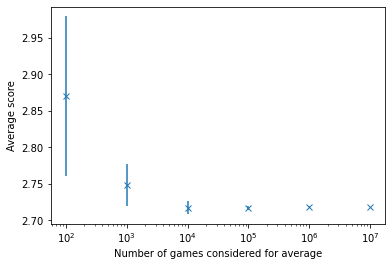

In [56]:
plt.figure()
plt.errorbar(x=average_scores[:,0], y=average_scores[:,1], yerr=average_scores[:,2], marker='x', linestyle='')
plt.xscale('log')
plt.xlabel('Number of games considered for average')
plt.ylabel('Average score')
plt.show()

So we can see that the average score approximates 2.718..., e.g. e, Euler's number.

<i>Extra credit: Marian now uses a target with 10 concentric circles, whose radii are 1, 2, 3, etc., all the way up to 10 — the radius of the entire target. This time, Robin must fire as many arrows as she can, such that each arrow falls within a smaller concentric circle than the previous arrow. On average, what score can Robin expect to achieve in this version of the archery challenge? </i>

In this case we need to calculate the probabilities of hitting each incrementally smaller concentric circle. Given the target of radius $R=10$, the probability of her hitting each a concentric circle with radii $r$ is the ratio of their areas, $\frac{\pi r^2}{\pi R^2} = \frac{r^2}{R^2}$.
To calculate the average score $\langle n \rangle$, first we must calculate the probability of getting that score $n$. This probability is however just the product of making all previous shots, e.g. a score of 5 is just $\frac{10^2}{10^2} \frac{9^2}{10^2} \frac{8^2}{10^2} \frac{7^2}{10^2}$.
Therefore we can calculate the average value by considering all scores, 2 (as Robin always hits the taget) through 11 (she gets all concentric cirlces in order), and their probabilites,

$\langle n \rangle = 2 \frac{10^2}{10^2} + 3\frac{10^2}{10^2}\frac{9^2}{10^2} + 4\frac{10^2}{10^2}\frac{9^2}{10^2}\frac{8^2}{10^2} + ... + 11\frac{10^2}{10^2}\frac{9^2}{10^2}\frac{8^2}{10^2}\frac{7^2}{10^2}...\frac{3^2}{10^2}\frac{2^2}{10^2}\frac{1^2}{10^2} = \displaystyle\sum_{i=1}^{10} (i+1)\displaystyle\prod_{j=1}^i \frac{(11-i)^2}{10^2}$.

Instead of trying to solve this analytically, we can quickly calculate in Python the result:

In [63]:
sum([(i+1)*np.product([(11-j)**2/10**2 for j in range(1, i+1)]) for i in range(1,11)])

8.514743256219239